In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

url = 'https://raw.githubusercontent.com/nt246/NTRES-6100-data-science/main/datasets/Titanic.csv'

df = pd.read_csv(url)

df.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [194]:
%matplotlib inline
sns.set()

In [195]:
def bar_chart(feature):
  grupo1 = df[df["Survived"] == 1][feature].value_counts()
  grupo0 = df[df["Survived"] == 0][feature].value_counts()

  test = pd.DataFrame([grupo1, grupo0])
  test.index = ["Sobrevivientes", "Fallecidos"]
  test.plot(kind="bar", stacked=True, figsize=(10,5))

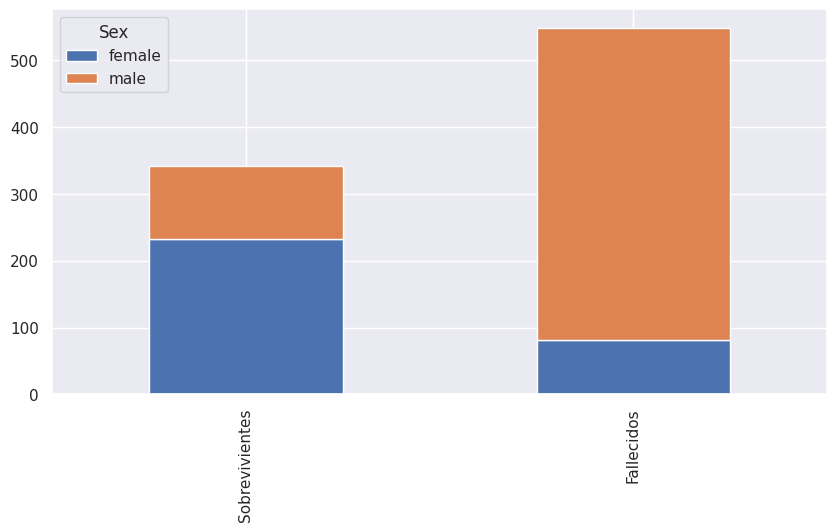

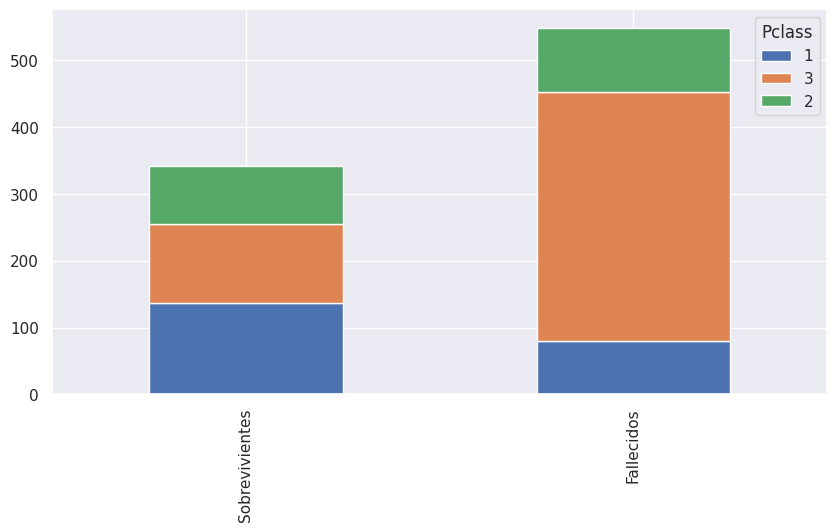

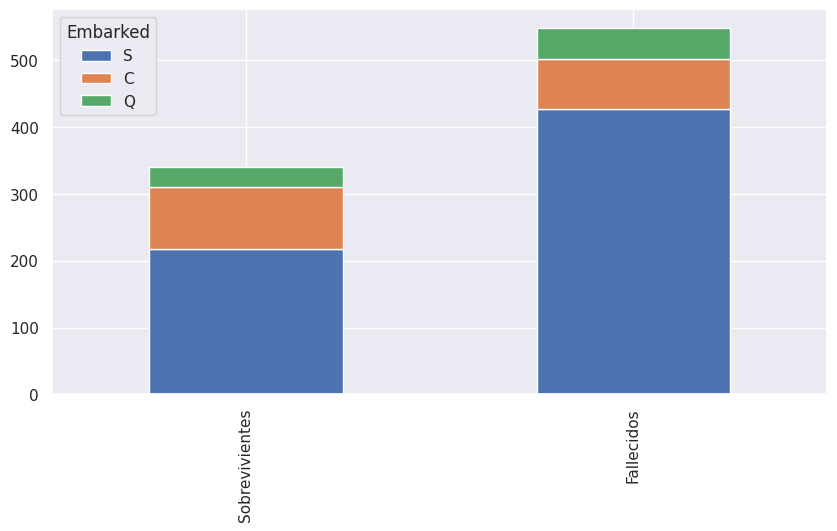

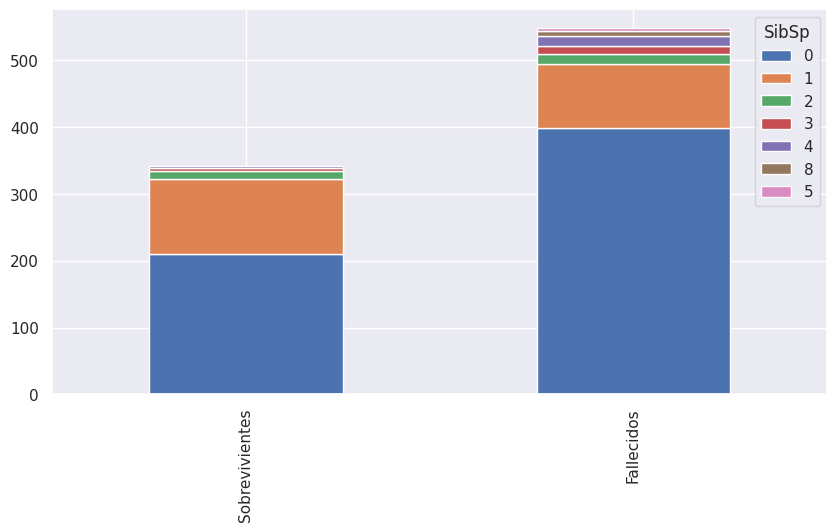

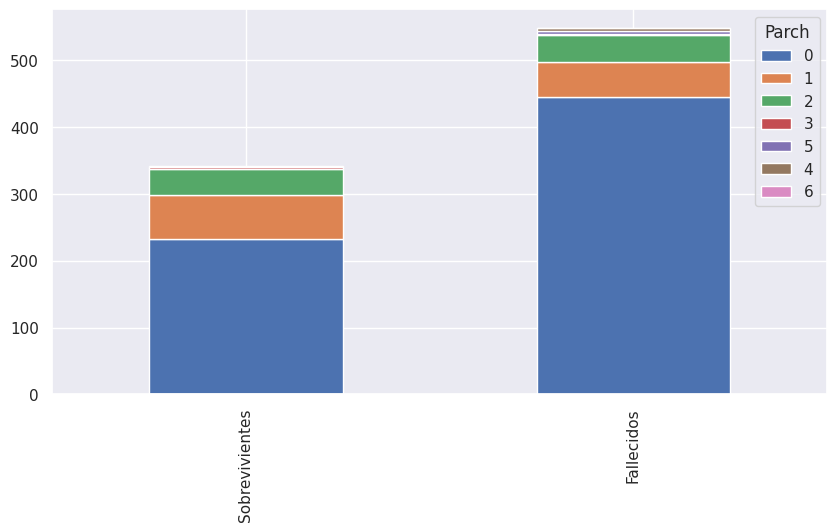

In [196]:
bar_chart("Sex")
bar_chart("Pclass")
bar_chart("Embarked")
bar_chart("SibSp")
bar_chart("Parch")

In [197]:
# Las gráficas identifican que:
# Sobrevivieron más mujeres que hombres.
# La clase 1 tuvo más chance de supervivencia que las demás clases.
# Tuvieron mayor probabilidad de supervivencia aquellos que embarcaron en 'C'.
# Aquellos que estaban casados o tenían familia la probabilidad de supervivencia era mayor.
# De acuerdo al Parch, los sobrevivientes tenían al menos 1 hijo.

In [198]:
# Feature Engineering
# De características que ya teníamos sacamos nuevas características con el fin de lograr que los algoritmos de machine learning funcionen correctamente.

In [199]:
# Cómo se hundió el Titanic?
# De acuerdo con lo conocido, por la proa del barco, donde estaban las habitaciones de tercera clase.

In [200]:
def extract_title(data):
  title = data["Name"].str.extract('([A-Za-z]+)\.', expand = True)
  return title

In [201]:
df["Title"] = extract_title(df)

In [202]:
df["Title"].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


In [203]:
# Creando un mapeo de los títulos.
# Reemplazamos los títulos encontrados por los siguientes valores:
# Mr = 0; Miss = 1; Mrs = 2; Otros = 3

In [204]:
def replace_titles(data):
  title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2}
  data["Title"] = data["Title"].map(title_mapping).fillna(3)
  return data

In [205]:
df = replace_titles(df)
df[["Name", "Title"]].head()

,Name,Title
0,"Braund, Mr. Owen Harris",0.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2.0
2,"Heikkinen, Miss. Laina",1.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2.0
4,"Allen, Mr. William Henry",0.0


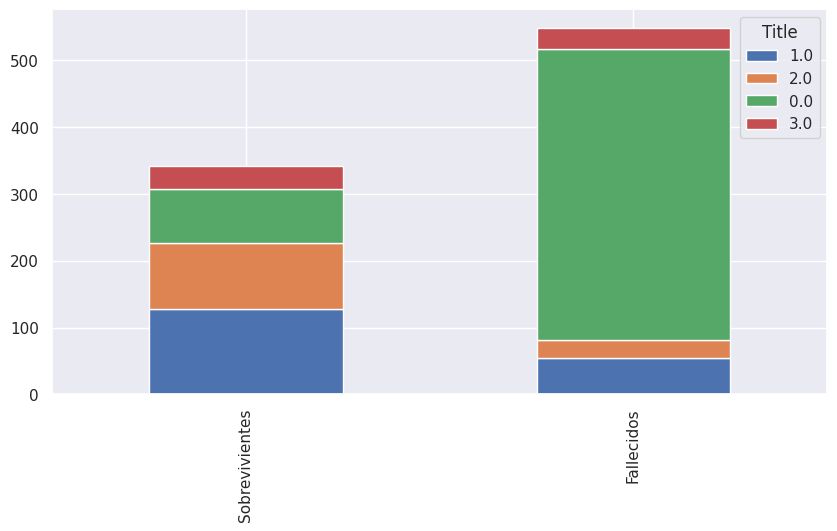

In [206]:
bar_chart("Title")

In [207]:
# Rellenar los NaN en edades
# Estrategia: Se calcula la media de los títulos y se reemplaza por las edades faltantes

In [208]:
title_age_means = df.groupby("Title")["Age"].mean()
title_age_means

,Age
Title,
0.0,32.368090
1.0,21.773973
2.0,35.898148
3.0,20.430161


In [209]:
df["Age"] = df.apply(lambda row: title_age_means[row["Title"]] if pd.isnull(row["Age"]) else row["Age"], axis=1)

In [210]:
df[["Title", "Age"]].head()

,Title,Age
0,0.0,22.0
1,2.0,38.0
2,1.0,26.0
3,2.0,35.0
4,0.0,35.0


(40.0, 60.0)

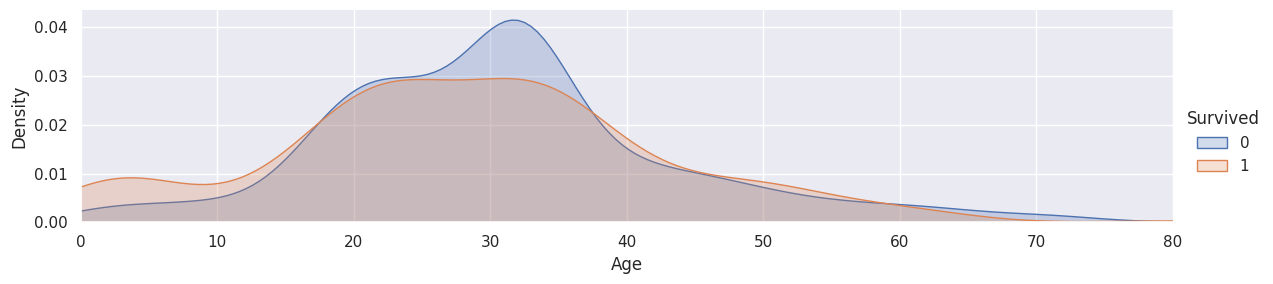

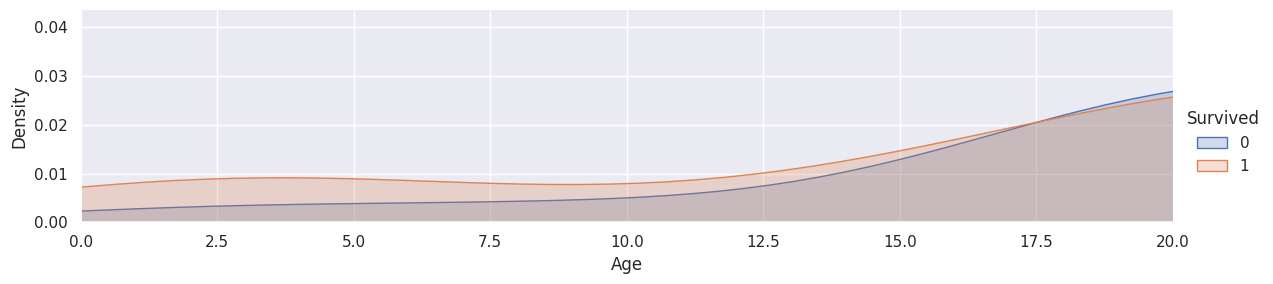

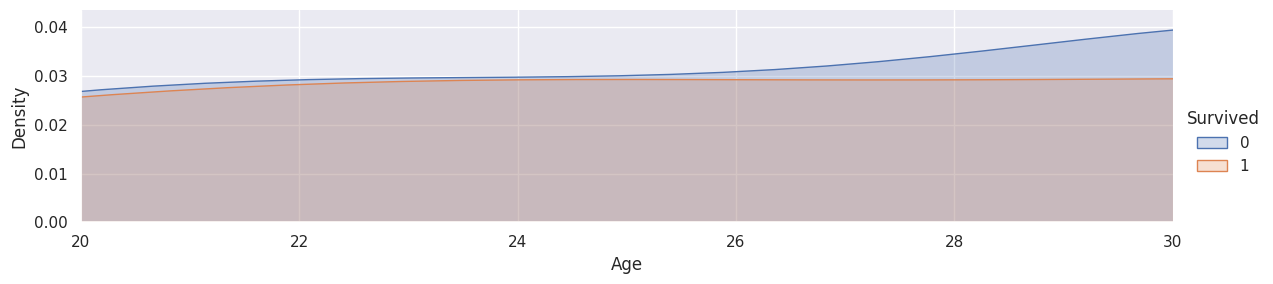

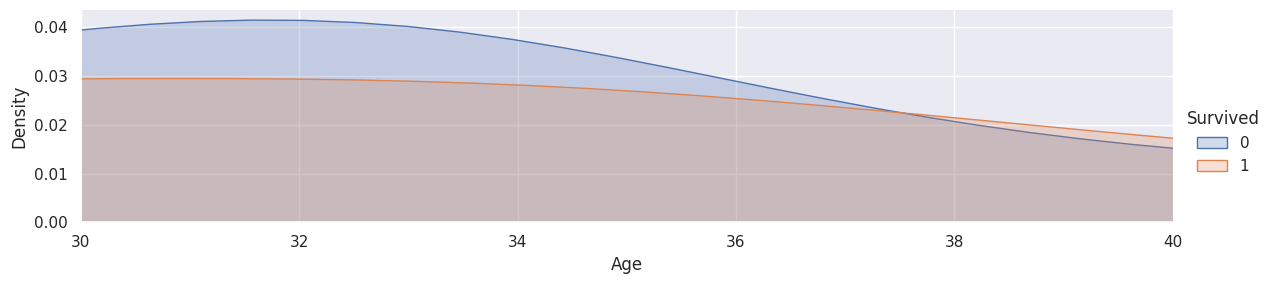

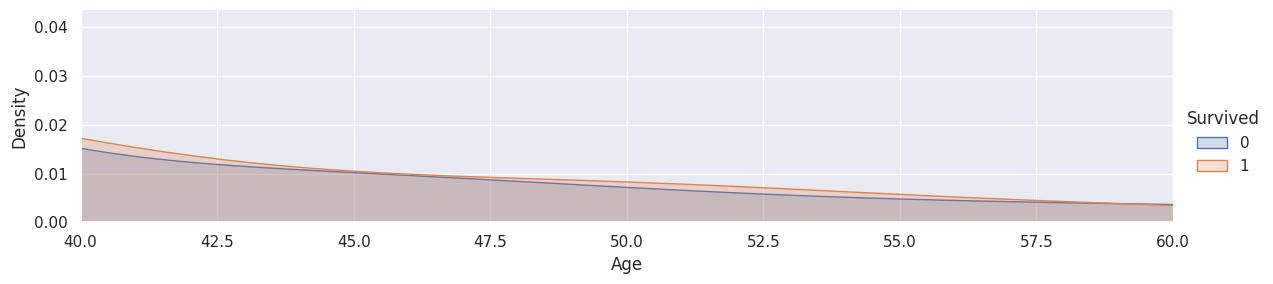

In [211]:
facet = sns.FacetGrid(df, hue = "Survived", aspect = 4)
facet.map(sns.kdeplot, "Age", fill = True)
facet.set(xlim = (0, df["Age"].max()))
facet.add_legend()

facet = sns.FacetGrid(df, hue = "Survived", aspect = 4)
facet.map(sns.kdeplot, "Age", shade = True)
facet.set(xlim = (0, df["Age"].max()))
facet.add_legend()
plt.xlim(0,20)

facet = sns.FacetGrid(df, hue = "Survived", aspect = 4)
facet.map(sns.kdeplot, "Age", shade = True)
facet.set(xlim = (0, df["Age"].max()))
facet.add_legend()
plt.xlim(20,30)

facet = sns.FacetGrid(df, hue = "Survived", aspect = 4)
facet.map(sns.kdeplot, "Age", shade = True)
facet.set(xlim = (0, df["Age"].max()))
facet.add_legend()
plt.xlim(30,40)

facet = sns.FacetGrid(df, hue = "Survived", aspect = 4)
facet.map(sns.kdeplot, "Age", shade = True)
facet.set(xlim = (0, df["Age"].max()))
facet.add_legend()
plt.xlim(40,60)

In [212]:
# Binning: Es convertir una variable numérica a categórica, en este caso, la edad
# Niño: 0; Joven: 1; Adulto: 2; Edad madura: 3; Edad avanzada: 4.

In [213]:
df["Age_Category"] = pd.cut(df["Age"], bins = [0, 16, 26, 36, 62, float("inf")], labels = [0, 1, 2, 3, 4], right = False)

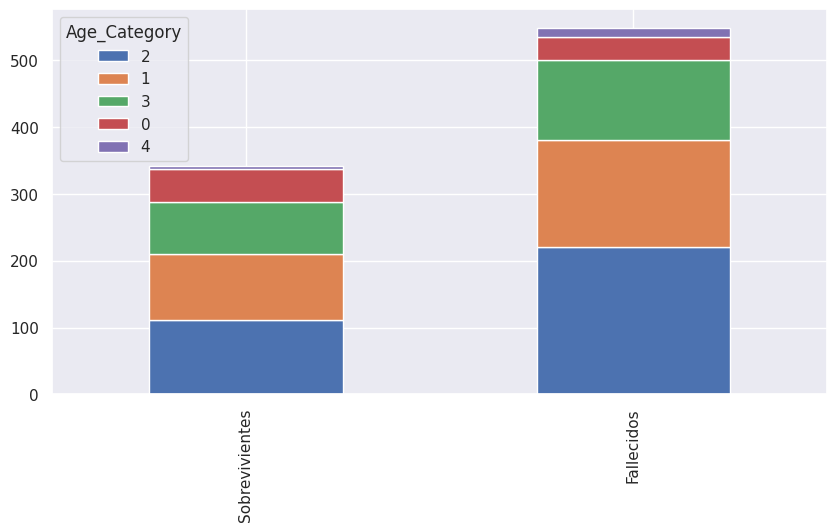

In [214]:
bar_chart("Age_Category")

In [215]:
# Actividad: Hacer lo mismo con Embarked (Profe me hice solo para esta actividad)
# Embarked tiene info tipo string, es decir "S", "C", "Q"

In [216]:
def extract_embarked(data):
  letter = data["Embarked"].str.extract('([A-Za-z])', expand = True)
  return letter

In [217]:
df["Embarked"] = extract_embarked(df)

In [218]:
df["Embarked"].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [219]:
# Creando un mapeo de la embarcación.
# Reemplazamos los títulos encontrados por los siguientes valores:
# S = 0; C = 1; Q = 2; Otros = 3

In [220]:
def replace_embarked(data):
  embarked_mapping = {"S": 0, "C": 1, "Q": 2}
  data["Embarked"] = data["Embarked"].map(embarked_mapping).fillna(3)
  return data

In [221]:
df = replace_embarked(df)
df[["Age", "Embarked"]].head()

,Age,Embarked
0,22.0,0.0
1,38.0,1.0
2,26.0,0.0
3,35.0,0.0
4,35.0,0.0


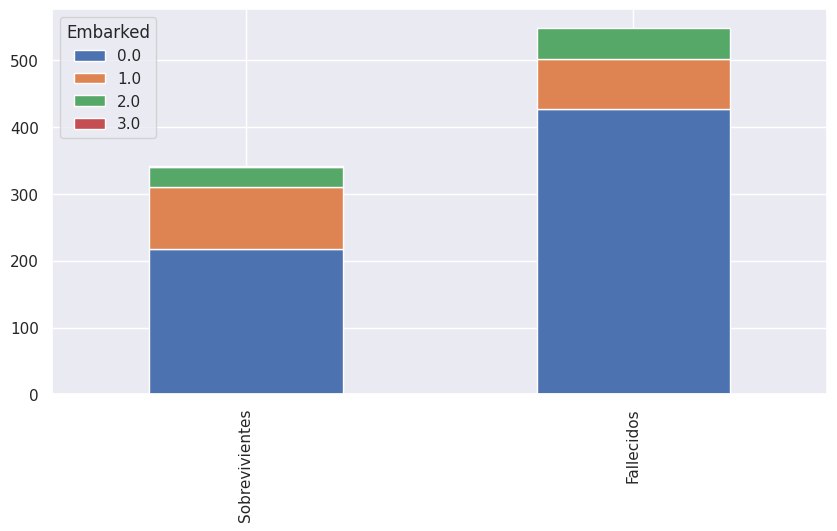

In [222]:
bar_chart("Embarked")

In [223]:
# Rellenar los NaN en Embarked
# Estrategia: Se calcula la media de embarked y se reemplaza por valores faltantes

In [224]:
embarked_age_means = df.groupby("Embarked")["Age"].mean()
embarked_age_means

,Age
Embarked,
0.0,29.690639
1.0,30.952868
2.0,27.693530
3.0,50.000000


In [225]:
df["Age"] = df.apply(lambda row: embarked_age_means[row["Embarked"]] if pd.isnull(row["Age"]) else row["Age"], axis=1)

In [233]:
df[["Embarked", "Age"]].head()

,Embarked,Age
0,0.0,22.0
1,1.0,38.0
2,0.0,26.0
3,0.0,35.0
4,0.0,35.0


(20.0, 30.0)

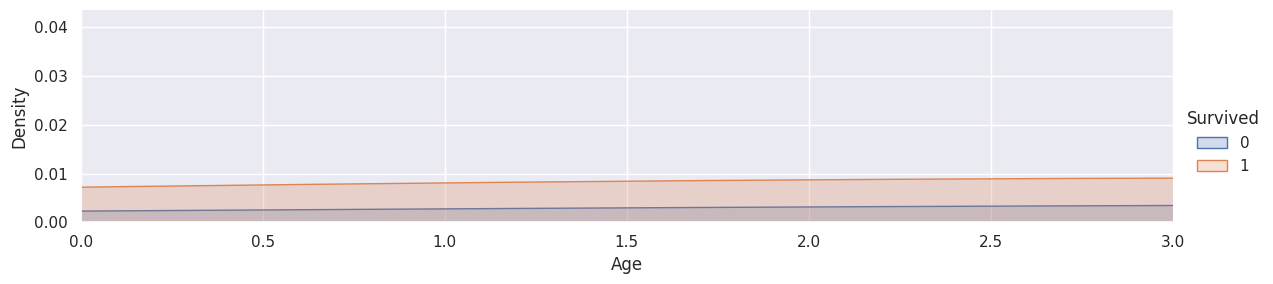

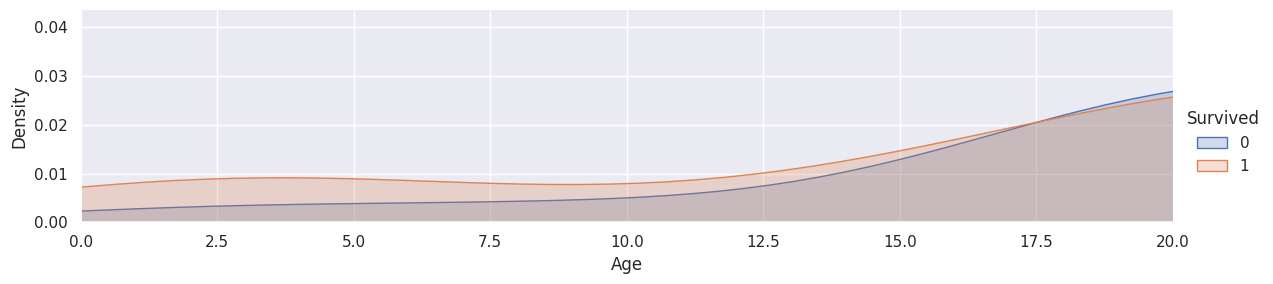

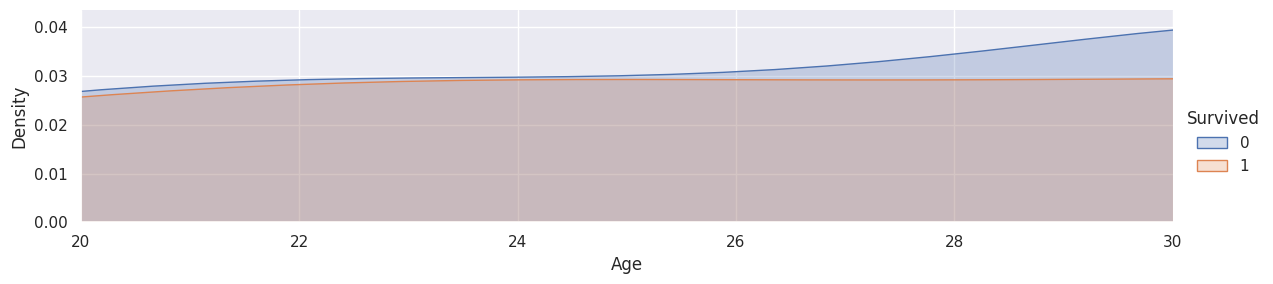

In [236]:
facet = sns.FacetGrid(df, hue = "Survived", aspect = 4)
facet.map(sns.kdeplot, "Age", fill = True)
facet.set(xlim = (0, df["Embarked"].max()))
facet.add_legend()

facet = sns.FacetGrid(df, hue = "Survived", aspect = 4)
facet.map(sns.kdeplot, "Age", shade = True)
facet.set(xlim = (0, df["Embarked"].max()))
facet.add_legend()
plt.xlim(0,20)

facet = sns.FacetGrid(df, hue = "Survived", aspect = 4)
facet.map(sns.kdeplot, "Age", shade = True)
facet.set(xlim = (0, df["Embarked"].max()))
facet.add_legend()
plt.xlim(20,30)

# CONCLUSIÓN

Puerto 1 (barra naranja) Presenta la mayor proporción de supervivientes.

Puerto 2 (verde) Intermedio

Puerto 0 (azul) Tiene la tasa más baja

Un pasajero que embarcó desde el 1, es decir, desde C, habría tenido de lejos una mejor oportunidad de vivir.